In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('DJIA.csv', encoding = 'ISO-8859-1')

In [5]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [6]:
df.shape

(1989, 27)

In [7]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

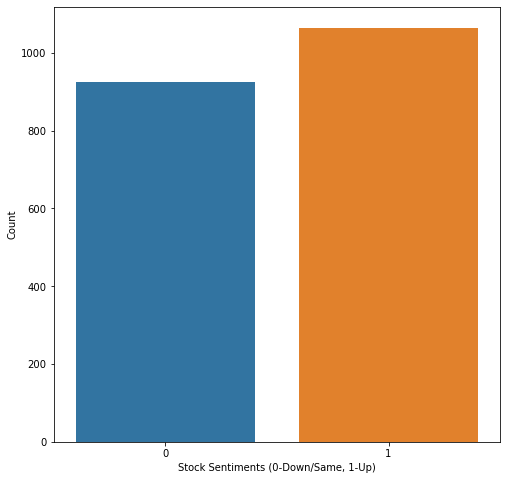

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [10]:
print(df.shape)
df.isna().any()

(1989, 27)


Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [11]:
df.dropna(inplace=True)
print(df.shape)

(1986, 27)


In [12]:
df_copy = df.copy()

In [13]:
df_copy.reset_index(inplace=True)

In [14]:
# Splitting the dataset into train an test set
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (1860, 28), Test size: (378, 28)


In [15]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [16]:
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [19]:
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

In [20]:
for i in new_columns:
    train[i] = train[i].str.lower()
    test[i] = test[i].str.lower()

In [21]:
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [22]:
train_headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [23]:
test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

In [24]:
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
  
  # Tokenizing the news-title by words
  words = train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [25]:
test_corpus = []

for i in range(0, len(test_headlines)):
  
  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [26]:
train_corpus[0:10]

['b georgia down two russian warplan countri move brink war b break musharraf impeach b russia today column troop roll south ossetia footag fight youtub b russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire b afghan children rape impun u n offici say sick three year old rape noth b russian tank enter south ossetia whilst georgia shoot two russian jet b break georgia invad south ossetia russia warn would interven side b enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like b georgian troop retreat osettain capit presum leav sever hundr peopl kill video b u prep georgia war russia b rice give green light israel attack iran say u veto isra militari op b announc class action lawsuit behalf american public fbi b russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal b china tell bush stay countri affair b world war iii start today b georgia invad south ossetia russia get involv nato 

In [27]:
test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march uk royal famili princ andrew name us lawsuit underag sex alleg asylum seeker refus leav bu arriv destin rural northern sweden demand taken back malm big citi pakistani boat blow self india navi chase four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year eve accord india defenc ministri sweden hit third mosqu arson attack week car set alight french new year salari top ceo rose twice fast averag canadian sinc recess studi norway violat equal pay law judg say judg find consul employe unjustli paid less male counterpart imam want radic recruit muslim you

In [28]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

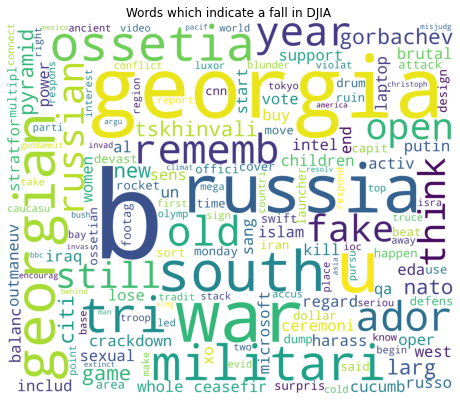

In [29]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

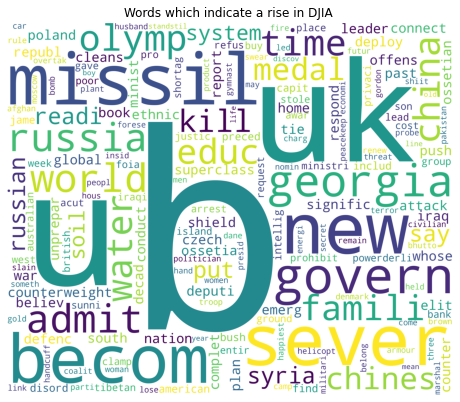

In [30]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [32]:
X_test = cv.transform(test_corpus).toarray()

In [33]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr_y_pred = lr_classifier.predict(X_test)

In [35]:

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.07%
Precision score is: 0.83
Recall score is: 0.83


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [37]:
lr_cm

array([[154,  32],
       [ 32, 160]], dtype=int64)

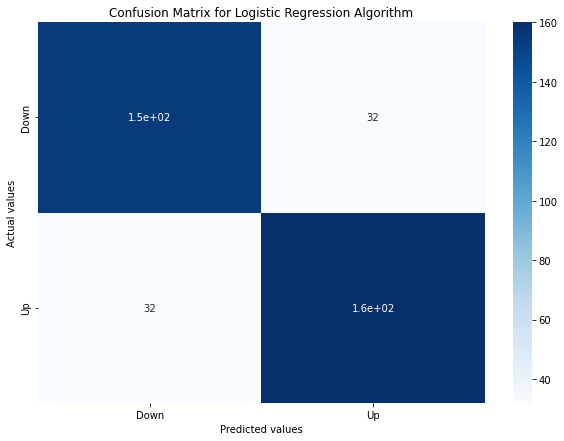

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [40]:
rf_y_pred = rf_classifier.predict(X_test)

In [41]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.45%
Precision score is: 0.82
Recall score is: 0.92


In [42]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [43]:
rf_cm

array([[147,  39],
       [ 16, 176]], dtype=int64)

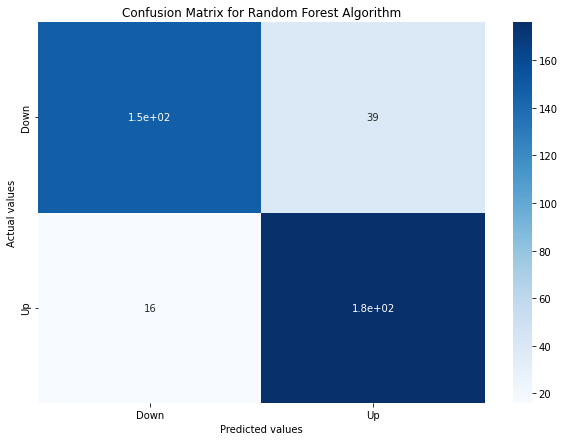

In [44]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [46]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [47]:

# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.92%
Precision score is: 0.86
Recall score is: 0.84


In [48]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[159,  27],
       [ 30, 162]], dtype=int64)

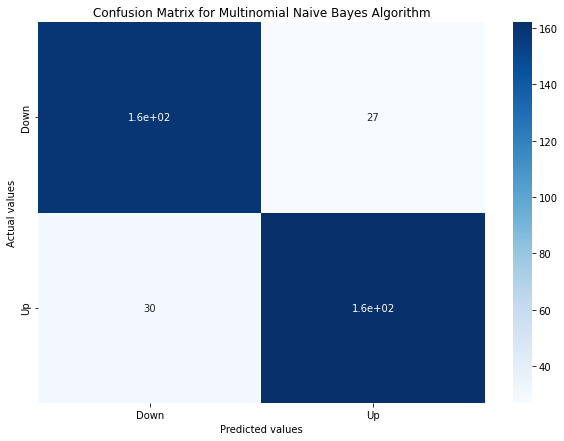

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [50]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [51]:
# For generating random integer
from random import randint

In [52]:
sample_test = df_copy[df_copy['Date'] > '20141231']

In [53]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [54]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: An indigenous community in the Peruvian Amazon took at least eight public officials hostage to demand help from the central government after an oil spill polluted its lands, authorities said Monday.
Prediction: The stock price will go up!


In [55]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Anonymous released 9,200 ISIS supporter Twitter account names to apply pressure on Twitter for suspending them
Prediction: The stock price will remain the same or will go down.


In [56]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Google to reorganize into new company called Alphabet
Prediction: The stock price will remain the same or will go down.


In [57]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: The HSBC bank is accused of systematic involvement in tax evasion and money laundering to the tune of more than 100 billion euros.
Prediction: The stock price will go up!


Scraper Model Code

In [58]:
import ssl
from urllib.request import urlopen
from textblob import TextBlob
from bs4 import BeautifulSoup as soup
import re

TextBlob

In [66]:
def news(news_url,counter):
    context=ssl.create_default_context()
    client=urlopen(news_url,context=context)
    xml_page=client.read()
    client.close()

    soup_page = soup(xml_page, "xml")
    news_list = soup_page.findAll("item")

    i=0
    f = 0
    for news in news_list:
        if i == counter:
            break
        s1 = f"{news.title.text}"
        
        blob = TextBlob(s1)

        print(f"news:{i + 1}: {news.title.text}")
       
        if stock_prediction(s1):
            print('Prediction: The stock price will remain the same or will go down.')
            f = f+1
        else:
            print('Prediction: The stock price will go up!')
            f = f-1
        print("\n ")
        

        i = i+1
    
    verdict = f/counter
    if verdict>0.2:
        print("Prediction: The stock price will go up!")
    elif verdict<-0.2:
        print("Prediction: The stock price will down")
    else :
        print("prediction: The stock should stay neutral")
    print(f"Confidence:{verdict}")
    


inpt = input("Enter the name of the company you want to search: ")
res=""
if bool(re.search(r"\s", inpt)):
    inpt_1=inpt.split()

    for x in range(0, len(inpt_1)-1):
        res=res + inpt_1[x]+ "%20"

    res=res+ inpt_1[len(inpt_1)-1]
else:
    res=inpt
num_news=int(input("Enter number of news you want: "))
news_link = f"https://news.google.com/rss/search?q={res}&hl=en-IN&gl=IN&ceid=IN:en"
news(news_link, num_news)


news:1: Alphabet: Deepening Into Marketing Recession (NASDAQ:GOOG) - Seeking Alpha
Prediction: The stock price will remain the same or will go down.

 
news:2: Google: Forget ChatGPT, Buy New Age Of Margin Expansion (NASDAQ:GOOG) - Seeking Alpha
Prediction: The stock price will remain the same or will go down.

 
news:3: ALPHABET INC. (NASDAQ: GOOGL, GOOG) SHAREHOLDER CLASS ACTION ALERT: Bernstein Liebhard LLP ... - PR Newswire
Prediction: The stock price will remain the same or will go down.

 
news:4: Why Alphabet, Palantir, and Other AI Stocks Rallied on Tuesday - The Motley Fool
Prediction: The stock price will remain the same or will go down.

 
news:5: ROSEN, A TRUSTED AND LEADING LAW FIRM, Encourages Alphabet Inc. Investors to Secure Counsel Before ... - Digital Journal
Prediction: The stock price will remain the same or will go down.

 
news:6: Is Alphabet (GOOG) Trading at an Attractive Price Now? - Insider Monkey
Prediction: The stock price will remain the same or will go dow

Stock_Prediction Function

In [65]:
def news(news_url,counter):
    context=ssl.create_default_context()
    client=urlopen(news_url,context=context)
    xml_page=client.read()
    client.close()

    soup_page = soup(xml_page, "xml")
    news_list = soup_page.findAll("item")

    i=0
    f = 0
    for news in news_list:
        if i == counter:
            break
        s1 = f"{news.title.text}"
        
        blob = stock_prediction(s1)

        print(f"news:{i + 1}: {news.title.text}")
       
        if stock_prediction(s1):
            print('Prediction: The stock price will remain the same or will go down.')
            f = f+1
        else:
            print('Prediction: The stock price will go up!')
            f = f-1
        print("\n ")
        

        i = i+1
    
    verdict = f/counter
    if verdict>0.2:
        print("Prediction: The stock price will go up!")
    elif verdict<-0.2:
        print("Prediction: The stock price will down")
    else :
        print("prediction: The stock should stay neutral")
    print(f"Confidence:{verdict}")
    


inpt = input("Enter the name of the company you want to search: ")
res=""
if bool(re.search(r"\s", inpt)):
    inpt_1=inpt.split()

    for x in range(0, len(inpt_1)-1):
        res=res + inpt_1[x]+ "%20"

    res=res+ inpt_1[len(inpt_1)-1]
else:
    res=inpt
num_news=int(input("Enter number of news you want: "))
news_link = f"https://news.google.com/rss/search?q={res}&hl=en-IN&gl=IN&ceid=IN:en"
news(news_link, num_news)


news:1: Alphabet: Deepening Into Marketing Recession (NASDAQ:GOOG) - Seeking Alpha
Prediction: The stock price will remain the same or will go down.

 
news:2: Google: Forget ChatGPT, Buy New Age Of Margin Expansion (NASDAQ:GOOG) - Seeking Alpha
Prediction: The stock price will remain the same or will go down.

 
news:3: ALPHABET INC. (NASDAQ: GOOGL, GOOG) SHAREHOLDER CLASS ACTION ALERT: Bernstein Liebhard LLP ... - PR Newswire
Prediction: The stock price will remain the same or will go down.

 
news:4: Why Alphabet, Palantir, and Other AI Stocks Rallied on Tuesday - The Motley Fool
Prediction: The stock price will remain the same or will go down.

 
news:5: ROSEN, A TRUSTED AND LEADING LAW FIRM, Encourages Alphabet Inc. Investors to Secure Counsel Before ... - Digital Journal
Prediction: The stock price will remain the same or will go down.

 
news:6: Is Alphabet (GOOG) Trading at an Attractive Price Now? - Insider Monkey
Prediction: The stock price will remain the same or will go dow